In [9]:
model = CustomProphet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonality,yhat
0,2007-12-10,8.051043,8.051043,8.051043,8.482202,8.482202,0.431160,8.482202
1,2007-12-11,8.051094,8.051047,8.051047,8.465258,8.465258,0.414211,8.465305
2,2007-12-12,8.051145,8.051051,8.051051,8.449079,8.449079,0.398028,8.449173
3,2007-12-13,8.051196,8.051055,8.051055,8.434086,8.434086,0.383031,8.434227
4,2007-12-14,8.051247,8.051059,8.051059,8.420667,8.420667,0.369609,8.420855
...,...,...,...,...,...,...,...,...
2930,2016-02-15,8.203436,8.062905,8.062905,8.228591,8.228592,0.165686,8.369123
2931,2016-02-16,8.203487,8.062909,8.062909,8.150471,8.150471,0.087562,8.291049
2932,2016-02-17,8.203538,8.062913,8.062913,8.075103,8.075104,0.012190,8.215729
2933,2016-02-18,8.203589,8.062917,8.062917,8.003394,8.003394,-0.059523,8.144067


In [3]:
model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast

#fig1 = model.plot(forecast)
#fig2 = model.plot_components(forecast)

18:40:47 - cmdstanpy - INFO - Chain [1] start processing
18:40:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.030540,7.827264,9.154170,8.030540,8.030540,0.455321,0.455321,0.455321,0.455321,0.455321,0.455321,0.0,0.0,0.0,8.485861
1,2007-12-11,8.029035,7.838230,9.163766,8.029035,8.029035,0.438311,0.438311,0.438311,0.438311,0.438311,0.438311,0.0,0.0,0.0,8.467345
2,2007-12-12,8.027529,7.781941,9.105106,8.027529,8.027529,0.422169,0.422169,0.422169,0.422169,0.422169,0.422169,0.0,0.0,0.0,8.449698
3,2007-12-13,8.026024,7.766257,9.068307,8.026024,8.026024,0.407335,0.407335,0.407335,0.407335,0.407335,0.407335,0.0,0.0,0.0,8.433359
4,2007-12-14,8.024518,7.802682,9.104129,8.024518,8.024518,0.394211,0.394211,0.394211,0.394211,0.394211,0.394211,0.0,0.0,0.0,8.418730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,2016-02-15,7.541847,7.022062,8.368322,7.541737,7.541847,0.131670,0.131670,0.131670,0.131670,0.131670,0.131670,0.0,0.0,0.0,7.673517
2931,2016-02-16,7.540849,6.958053,8.331896,7.540691,7.540849,0.054119,0.054119,0.054119,0.054119,0.054119,0.054119,0.0,0.0,0.0,7.594969
2932,2016-02-17,7.539852,6.823497,8.186318,7.539581,7.539855,-0.020728,-0.020728,-0.020728,-0.020728,-0.020728,-0.020728,0.0,0.0,0.0,7.519124
2933,2016-02-18,7.538854,6.773593,8.091593,7.538387,7.538934,-0.091978,-0.091978,-0.091978,-0.091978,-0.091978,-0.091978,0.0,0.0,0.0,7.446875


In [1]:
from customProphet4 import *
from prophet import Prophet
import matplotlib.pyplot as plt
import psutil
import time
import pandas as pd
plt.style.use('ggplot')

df = pd.read_csv('peyton_manning.csv')

# Memory Tracker

def get_current_process_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss  # Returning Resident Set Size (physical memory usage)

def run_function_and_get_memory(target_function, num_runs=5, sleep_time=1):
    memory_usages = []

    for _ in range(num_runs):
        # Run the target function
        target_function()
        
        # Wait for a bit to ensure the process memory usage is stable
        time.sleep(sleep_time)
        
        # Get the memory usage of the current process
        memory_usage = get_current_process_memory_usage()
        
        # Add to the list if memory usage is found
        if memory_usage:
            memory_usages.append(memory_usage)
        
    if memory_usages:
        memory_usage = np.array(memory_usages)
        m = memory_usage.mean()
        std = memory_usage.std()
        return m, std
    else:
        return None

/Users/adly/Desktop/customProphet/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


$\displaystyle g(t_i) = (k + a(t_i)\delta)t_i + (m + a(t_i)\gamma)\\
s(t_i) = \sum a_n \cos(\frac{2\pi t_i n}{P}) + b_n \sin(\frac{2\pi t_i n}{P}) = X(t_i) \beta\\
\mathcal{L}(k, m, \delta, \beta) = \frac{1}{2\sigma_{obs}^{2}} \sum_{i=1}^{T} \left[y_i - (g(t_i) + s(t_i))\right]^2 + \frac{1}{\tau}\sum |\delta_i| + \frac{1}{2\sigma^2}\sum \beta_i^2 + \frac{k^2}{2\sigma_k^2} + \frac{m^2}{2\sigma_m^2}$

## Finite Difference Peyton Manning

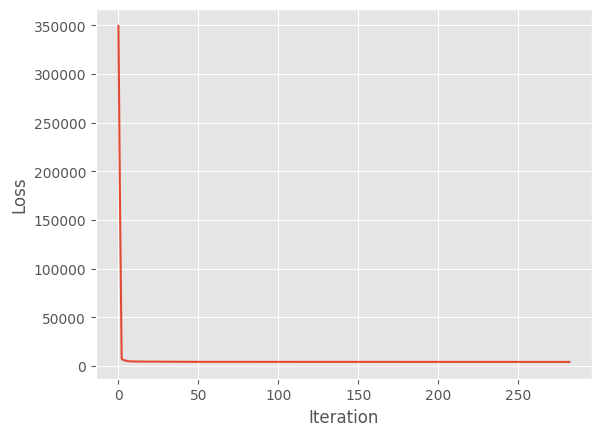

In [15]:
model = CustomProphet()
model.fit(df)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [16]:
model.opt

  message: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  success: False
   status: 1
      fun: 4123.792703996898
        x: [-2.172e-01  6.240e-01 ...  4.117e-04 -5.988e-03]
      nit: 283
      jac: [-1.677e+01 -1.114e+02 ...  1.692e-02 -1.647e+01]
     nfev: 15024
     njev: 313
 hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>

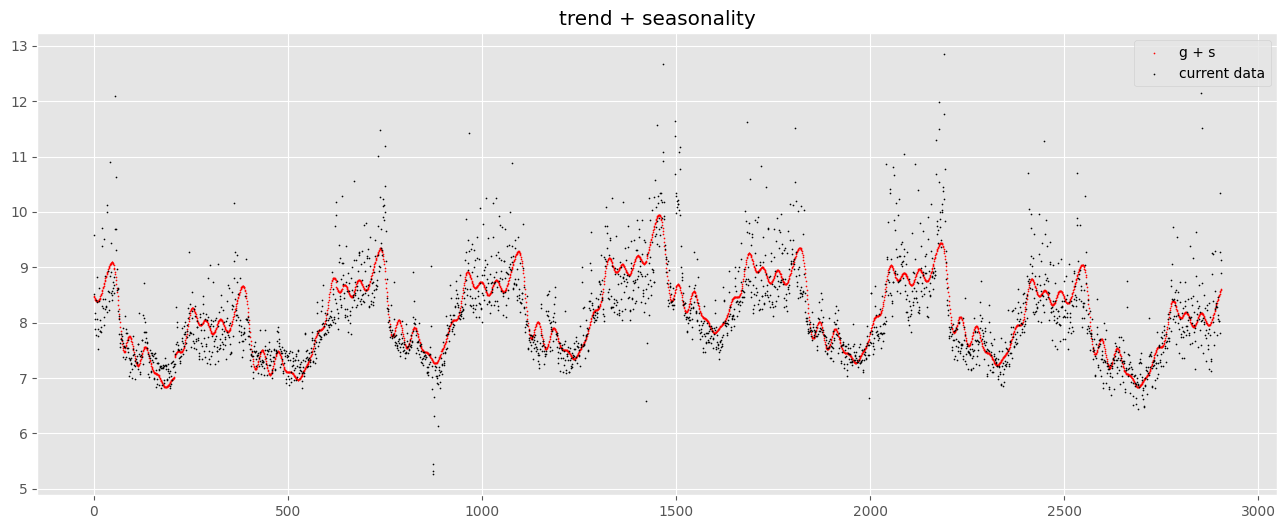

In [17]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

In [7]:
delta

array([ 3.19009055e-05,  1.34939172e-03, -2.67495417e-09,  3.45858863e-03,
        2.51285862e-03,  1.02047562e-03,  3.06475624e-05,  1.17383358e-03,
       -1.31878857e-04, -1.78347923e-05,  7.27583218e-05, -5.16180561e-04,
        5.25592527e-05, -6.76505928e-05, -5.34458048e-03, -8.91224124e-02,
       -9.93888927e-02, -6.06306100e-02, -2.39311473e-02, -8.25403870e-04,
       -8.07500398e-04,  4.03926186e-04, -2.74288298e-03, -2.62123149e-03,
       -1.33208813e-04])

## Analytic Gradient Peyton Manning

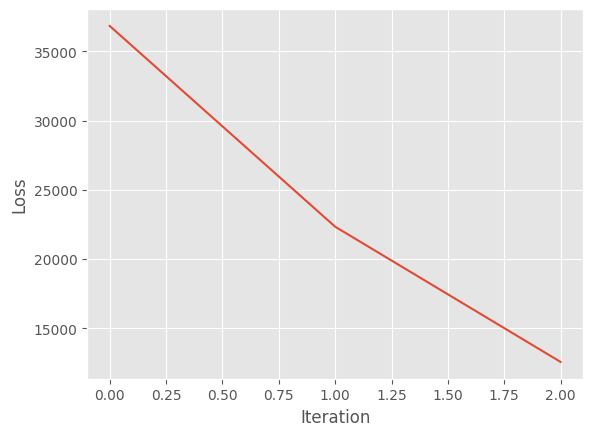

In [8]:
model = CustomProphet()
model.fit(df, analytic=True)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [10]:
model.opt

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 11709.279900866439
        x: [ 1.345e-02  4.535e-01 ...  3.918e-03 -5.148e-03]
      nit: 3
      jac: [ 6.224e+02  6.266e+02 ...  2.808e+00 -2.044e-01]
     nfev: 53
     njev: 53
 hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>

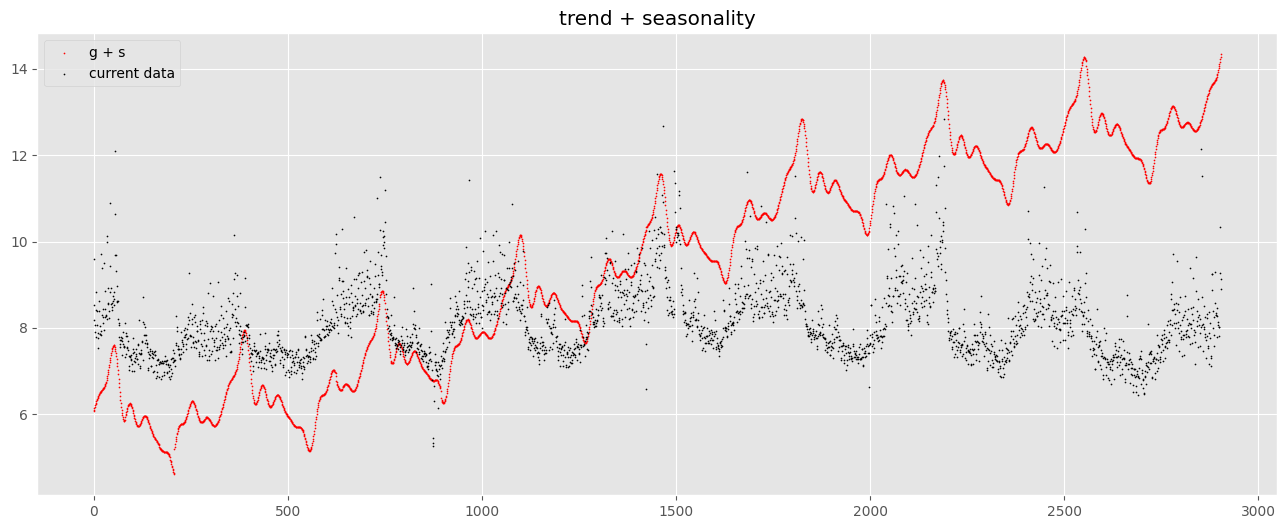

In [11]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

## Objective + Gradient Combined Peyton Manning

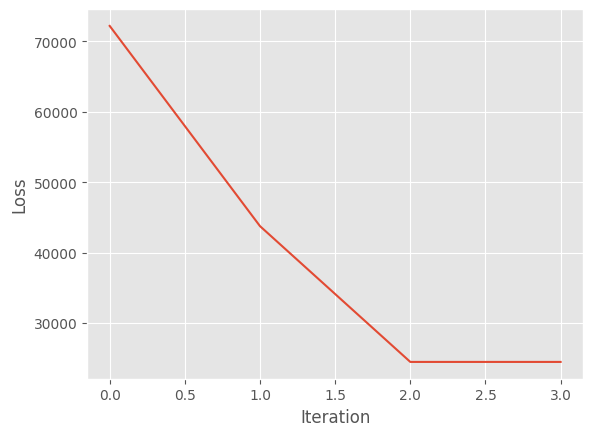

In [12]:
model = CustomProphet()
model.fit(df, use_combined=True)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [13]:
model.opt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 24480.816085747538
        x: [ 1.327e-02  4.515e-01 ...  3.904e-03 -5.127e-03]
      nit: 4
      jac: [ 6.178e+02  6.163e+02 ...  2.766e+00 -1.345e-01]
     nfev: 28
     njev: 28
 hess_inv: <47x47 LbfgsInvHessProduct with dtype=float64>

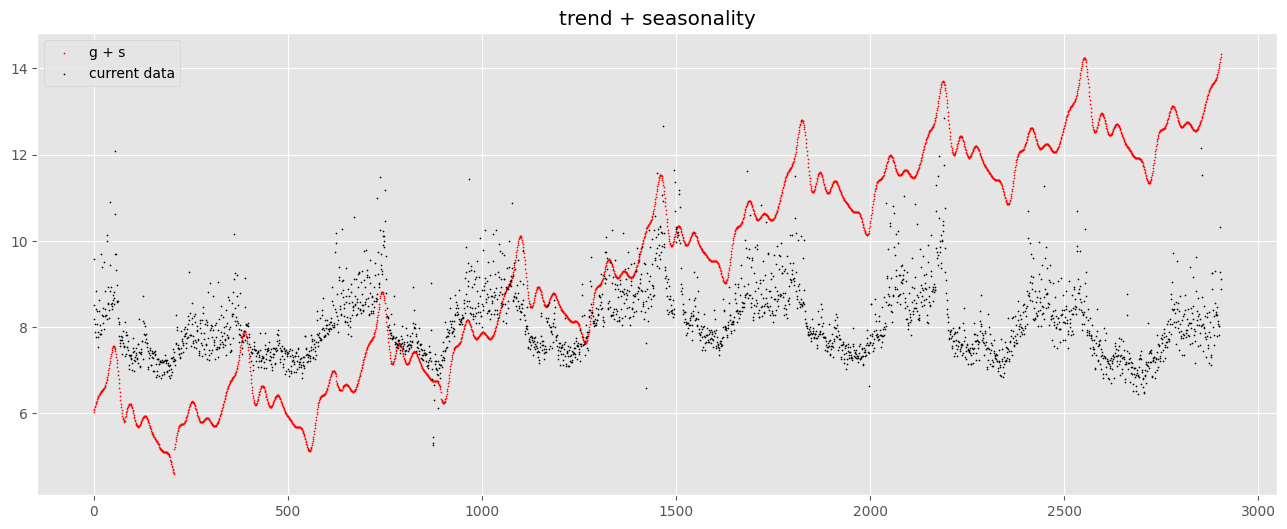

In [14]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

## Fitting Time

In [2]:
%%timeit -r 10 -n 10

# Finite differences
model = CustomProphet()
model.fit(df)

3.4 s ± 567 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [3]:
%%timeit -r 10 -n 10

# Analytic
model = CustomProphet()
model.fit(df, analytic=True)

231 ms ± 30.6 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [4]:
%%timeit -r 10 -n 10

# Combined
model = CustomProphet()
model.fit(df, use_combined=True)

156 ms ± 26.7 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [5]:
%%timeit -r 10 -n 10

# Prophet
model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
model.fit(df)

18:09:16 - cmdstanpy - INFO - Chain [1] start processing
18:09:17 - cmdstanpy - INFO - Chain [1] done processing
18:09:17 - cmdstanpy - INFO - Chain [1] start processing
18:09:17 - cmdstanpy - INFO - Chain [1] done processing
18:09:17 - cmdstanpy - INFO - Chain [1] start processing
18:09:17 - cmdstanpy - INFO - Chain [1] done processing
18:09:17 - cmdstanpy - INFO - Chain [1] start processing
18:09:18 - cmdstanpy - INFO - Chain [1] done processing
18:09:18 - cmdstanpy - INFO - Chain [1] start processing
18:09:18 - cmdstanpy - INFO - Chain [1] done processing
18:09:18 - cmdstanpy - INFO - Chain [1] start processing
18:09:18 - cmdstanpy - INFO - Chain [1] done processing
18:09:18 - cmdstanpy - INFO - Chain [1] start processing
18:09:19 - cmdstanpy - INFO - Chain [1] done processing
18:09:19 - cmdstanpy - INFO - Chain [1] start processing
18:09:19 - cmdstanpy - INFO - Chain [1] done processing
18:09:19 - cmdstanpy - INFO - Chain [1] start processing
18:09:19 - cmdstanpy - INFO - Chain [1]

334 ms ± 10.6 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## Memory Tracking

In [2]:
# Finite differences
def prophetFit():
    model = CustomProphet()
    model.fit(df)
    
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=30, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

Average memory usage over 30 runs: 81.31302083333334 MB +/- 9.36199747911978 MB


In [3]:
# Analytic
def prophetFit():
    model = CustomProphet()
    model.fit(df, analytic=True)
    
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=30, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

Average memory usage over 30 runs: 93.40677083333334 MB +/- 5.64639375389683 MB


In [4]:
# Combined
def prophetFit():
    model = CustomProphet()
    model.fit(df, use_combined=True)
    
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=30, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

Average memory usage over 30 runs: 97.53072916666666 MB +/- 1.6786345213705114 MB


In [5]:
# Prophet
def prophetFit():
    model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)

# Example usage:
average_memory_usage, std = run_function_and_get_memory(prophetFit, num_runs=30, sleep_time=1)
if average_memory_usage:
    print(f"Average memory usage over 30 runs: {average_memory_usage / 1024**2} MB +/- {std / 1024**2} MB")
else:
    print("Failed to measure memory usage.")

19:36:52 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing
19:36:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:01 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing
19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing
19:37:03 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1]

Average memory usage over 30 runs: 103.53854166666666 MB +/- 37.395247732183684 MB


## Model Plot

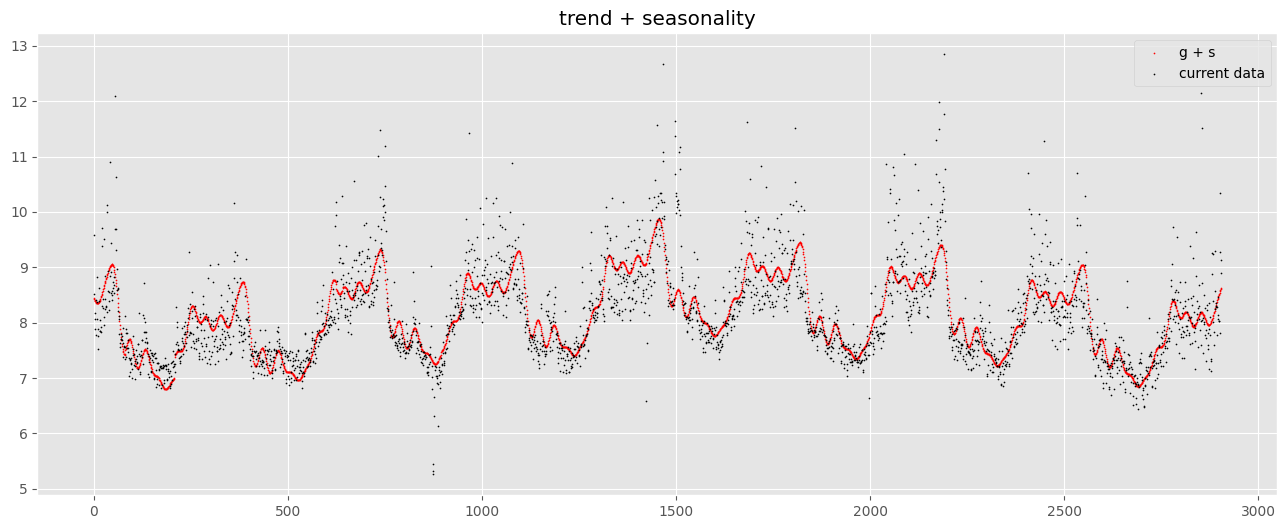

In [5]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

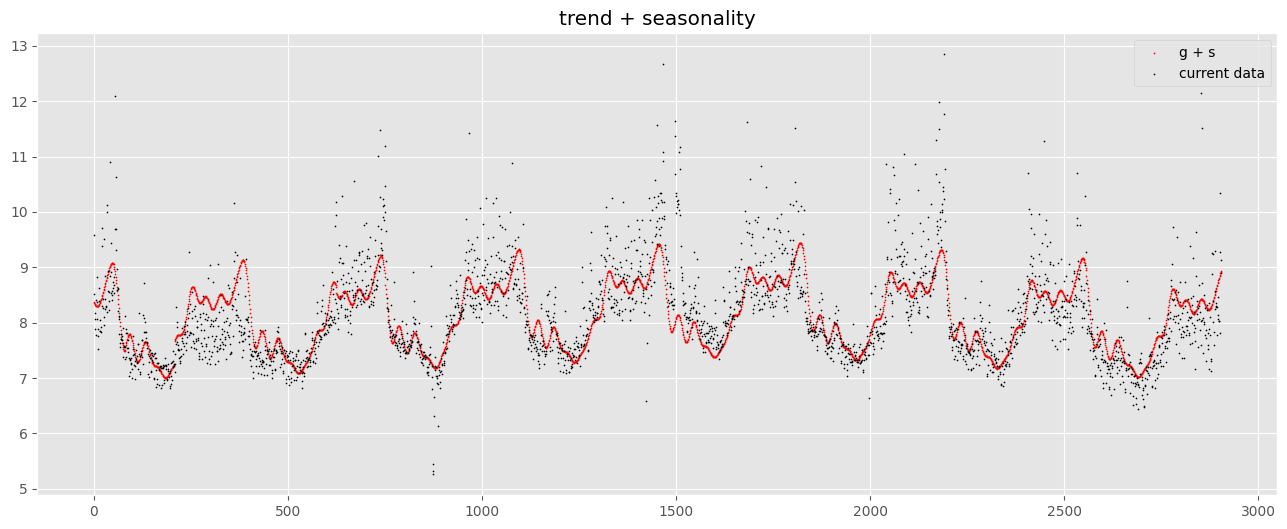

In [9]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

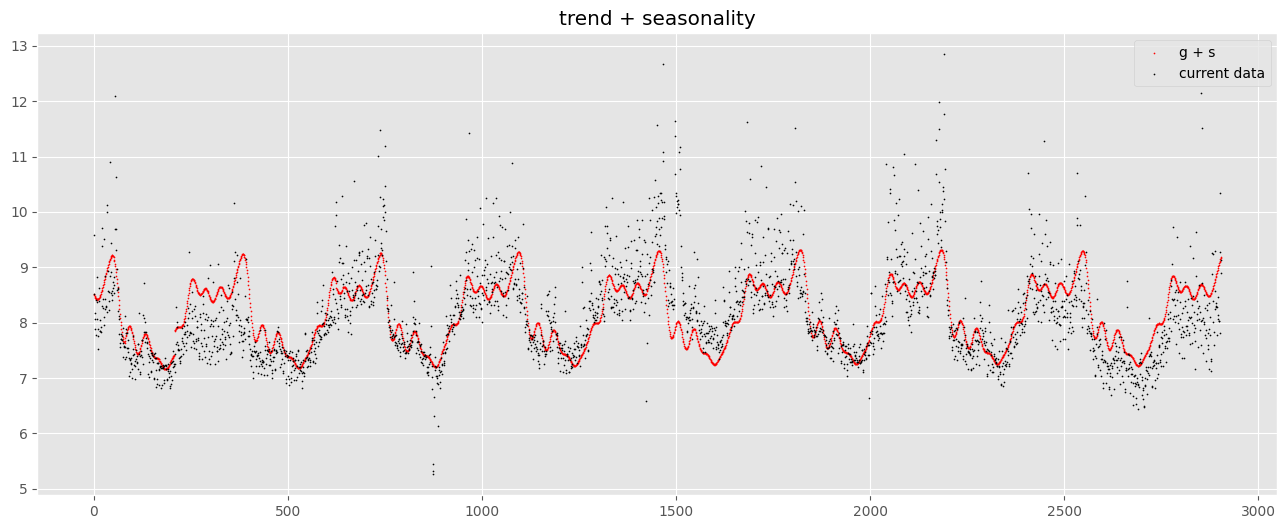

In [7]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = ((k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma))) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()

***
## VoLTE_ATT

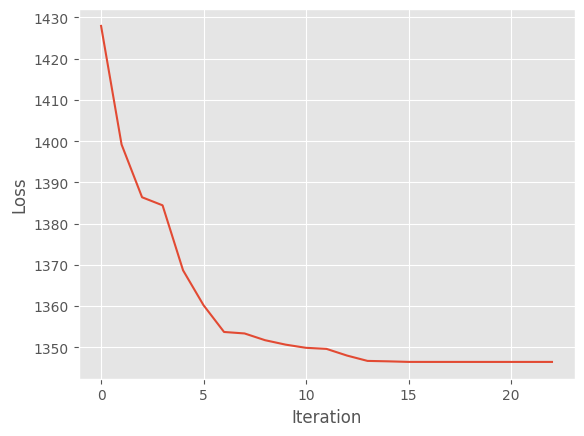

In [5]:
df = pd.read_csv('sample_data_2.csv')

CHANNEL = 84058 # channel to forecast

START_DATE = '2021/07/01 0:00'
END_DATE = '2021/07/07 23:00'

df['START_TIME'] = pd.to_datetime(df['START_TIME'], format='%Y/%m/%d %H:%M')

df.ffill(inplace=True) # fill missing values with previous values
df = df[df['eNodeB_ID'] == CHANNEL] # filter by eNodeB_ID=84058

# filter by date range
start_date = pd.to_datetime(START_DATE)
end_date = pd.to_datetime(END_DATE)
df = df[(df['START_TIME'] >= start_date) & (df['START_TIME'] <= end_date)]
df = df.loc[:, ['START_TIME', 'VoLTE_ATT']]

# create new columns 't' and 'y_scaled'
df['t'] = (df['START_TIME'] - df['START_TIME'].min()) / (df['START_TIME'].max() - df['START_TIME'].min())
df['y_scaled'] = df['VoLTE_ATT'] / df['VoLTE_ATT'].max()
df.rename(columns={'START_TIME': 'ds', 'VoLTE_ATT': 'y'}, inplace=True)

model = CustomProphet()
model.fit(df)

# Plot the loss over iterations
plt.plot(model.loss_over_iterations)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

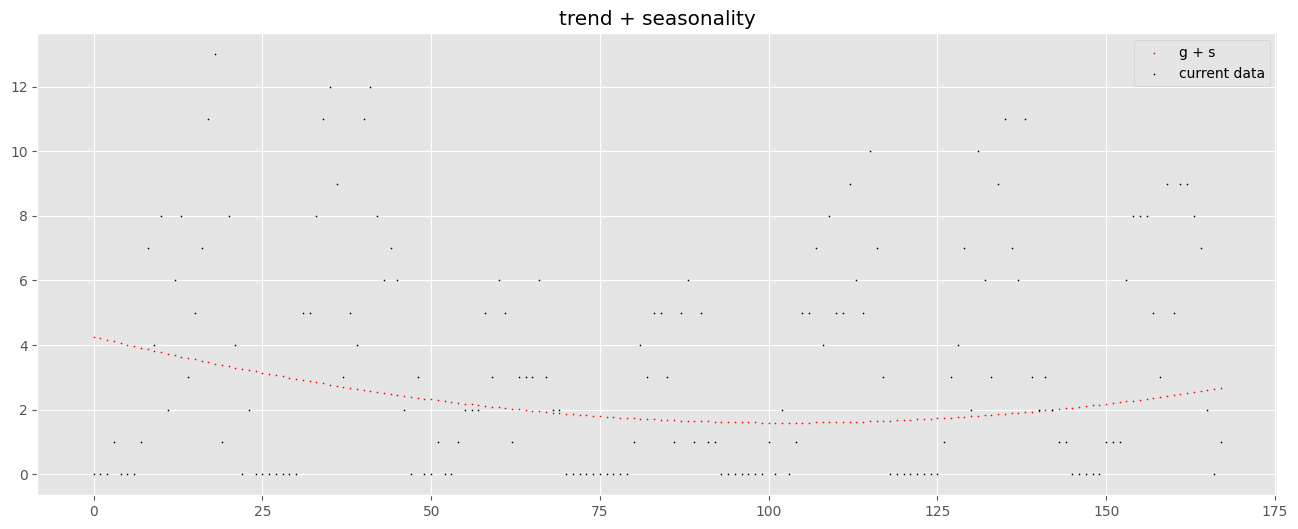

In [6]:
opt_params = model.get_parameters()
k, m, delta, beta = extract_params(opt_params)

# trend component
A = (model.t_scaled[:, None] > np.array(model.change_points)) * 1
gamma = -model.change_points * delta
g = (k + det_dot(A, delta)) * model.t_scaled + (m + det_dot(A, gamma)) * model.y_absmax

x = fourier_components(model.t_scaled, 365.25 / model.scale_period, 10)
s = det_dot(x, beta) * model.y_absmax

plt.figure(figsize=(16, 6))
plt.title('trend + seasonality')
plt.scatter(np.arange(df.shape[0]), g+s, s=0.5, label='g + s', color='red')
plt.scatter(np.arange(df.shape[0]), model.y, s=0.5, label='current data', color='black')
plt.legend()
plt.show()